In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
import warnings
import shap
import lime
import imblearn
from sklearn import set_config
set_config('diagram')
warnings.filterwarnings('ignore')

d:\Coding\Personal\Learning\ML\Practice_Scikit\ML\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# loading the data
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print(df.shape)
df.dtypes
print(df.isna().values.any()) # no misising values
df.info()

(284807, 31)
False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  floa

In [4]:
# looking for duplicates
df.duplicated().values.any()
print(df.duplicated().value_counts())

# stats summary
df.describe(include='int64') # for feature exibiting data - not useful fr
df.describe(include='float') # for featureless data - not so useful

False    283726
True       1081
Name: count, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,6.418678e-16,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [5]:
# outliers detection 
def outlier_detection(df):
    outlier_count = {}
    for column in df.columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outlier = df[(df[column] > upper_bound) | (df[column]< lower_bound)]
        outlier_count[column] = outlier.shape[0]
    return outlier_count

outlier_iqr = outlier_detection(df)
outlier_df = pd.DataFrame(list(outlier_iqr.items()))
outlier_df

,0,1
0,Time,0
1,V1,7062
2,V2,13526
3,V3,3363
4,V4,11148
5,V5,12295
6,V6,22965
7,V7,8948
8,V8,24134
9,V9,8283


Class
0    284315
1       492
Name: count, dtype: int64

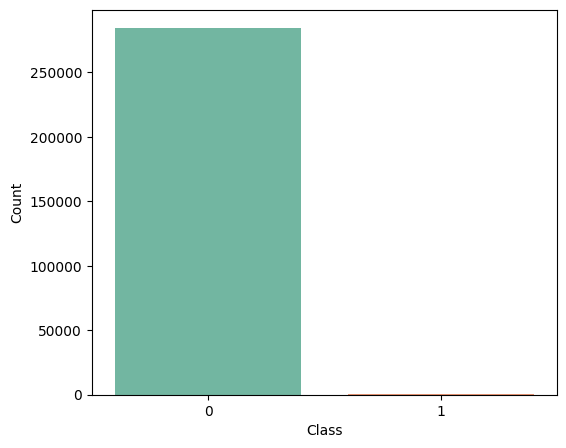

In [6]:
# Checking for class imbalance
class_balance = df['Class'].value_counts() # highly imbalanced dataset

# plotting the class imbalance
plt.figure(figsize=(6,5))
plt.xlabel("Class")
plt.ylabel("Count")
sns.countplot(data=df, x='Class', palette='Set2')
class_balance

Observations: 
- This dataset have 284807 records and 31 features (30 independent and 1 target feature - Class))
- 1081 duplications are found among 284807 records - removing them is must!
- dataset has no missing values
- dataset have high amount of outliers; but hey outliers are fraudalent transactions here; so we'll avoid touchhing them.
- dataset is highly imbalanced with 99.83% of data towards "No fraud transaction" and only 473 transactions are fraud transactions

In [7]:
# data-cleaning
df.drop_duplicates(inplace=True)

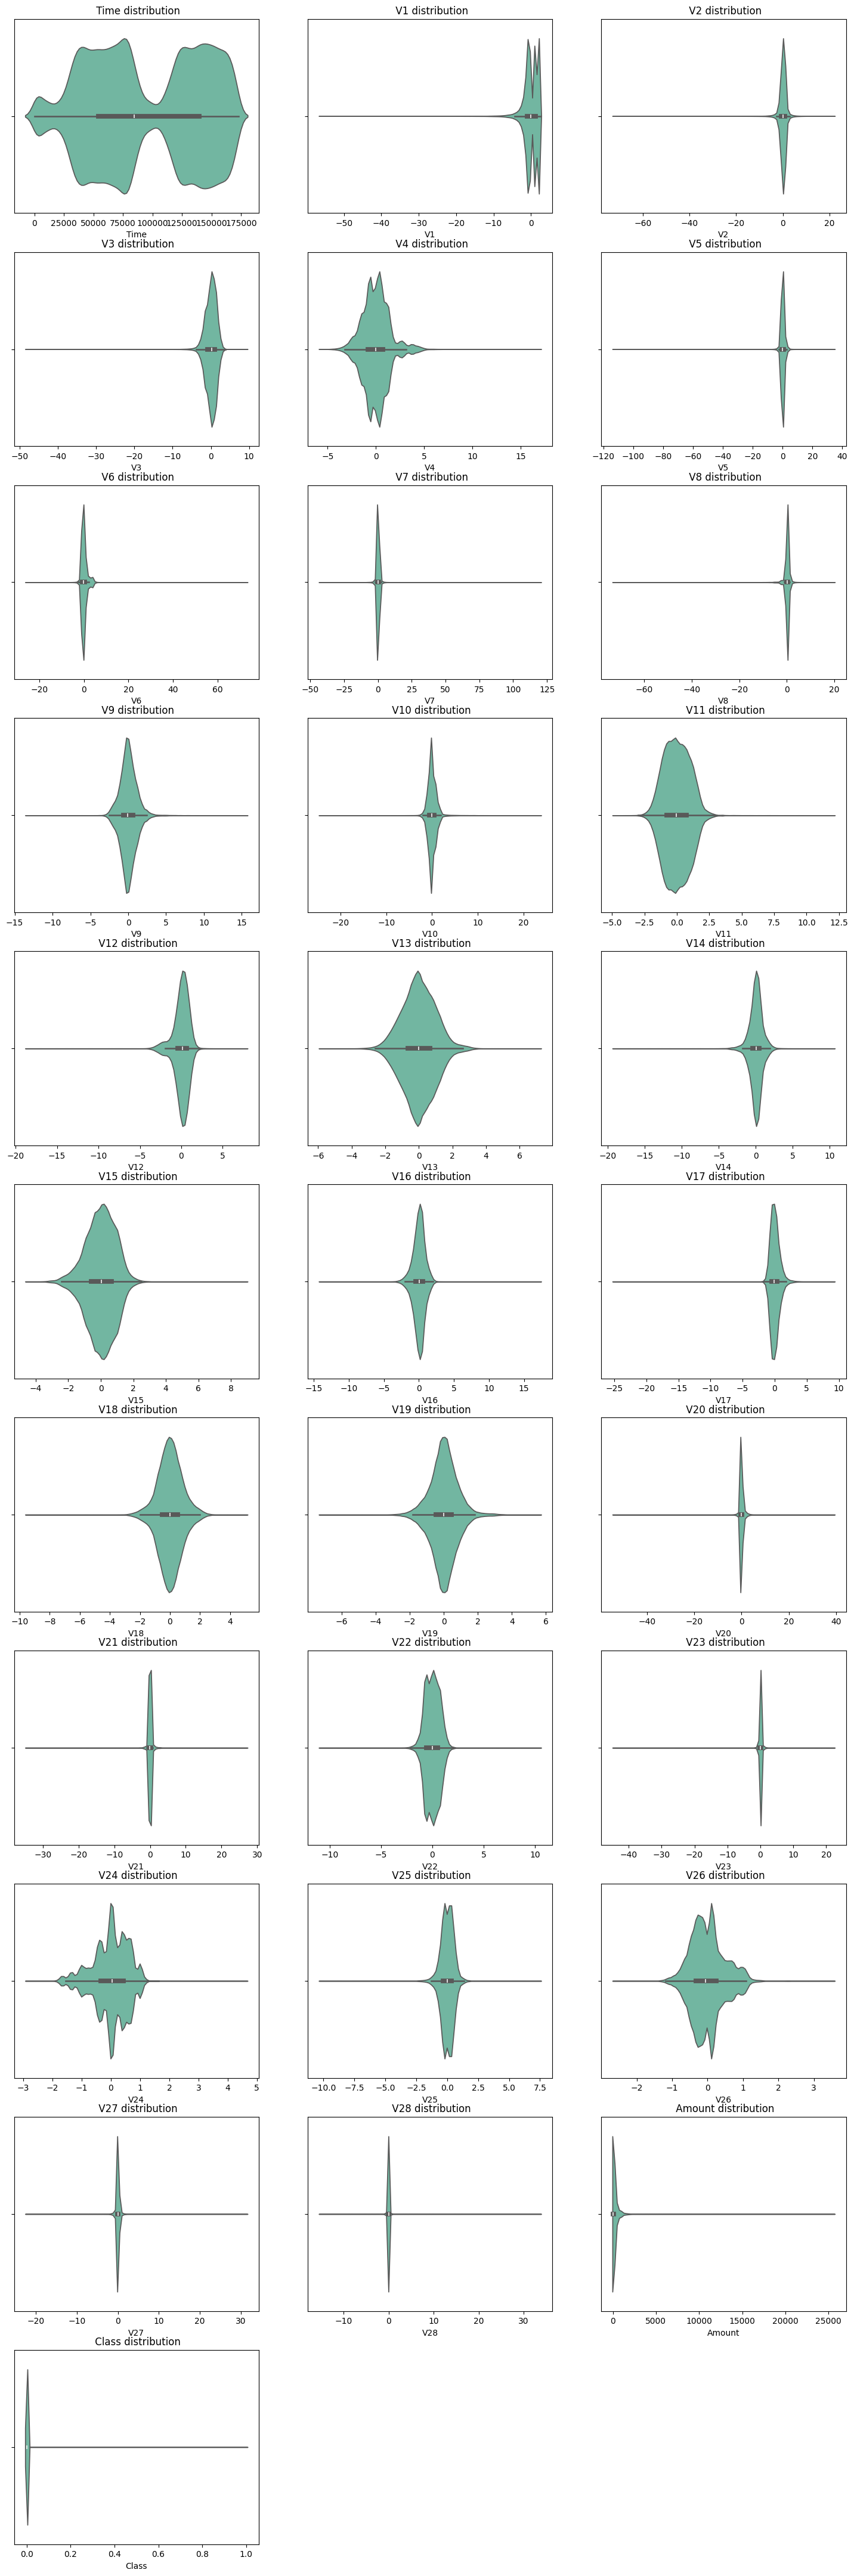

In [8]:
# EDA
num_rows = int(np.ceil(len(df.columns) / 3))
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18,5*num_rows))

for i, column in enumerate(df.columns):
    row, col_index = divmod(i, 3)
    sns.violinplot(data=df, x=column, ax=axes[row, col_index], palette='Set2')
    axes[row, col_index].set_title(f" {column} distribution")
    axes[row, col_index].grid(False)
    
if len(df.columns) % 3 != 0:
    for j in range(len(df.columns) % 3, 3):
        fig.delaxes(axes[-1, j])

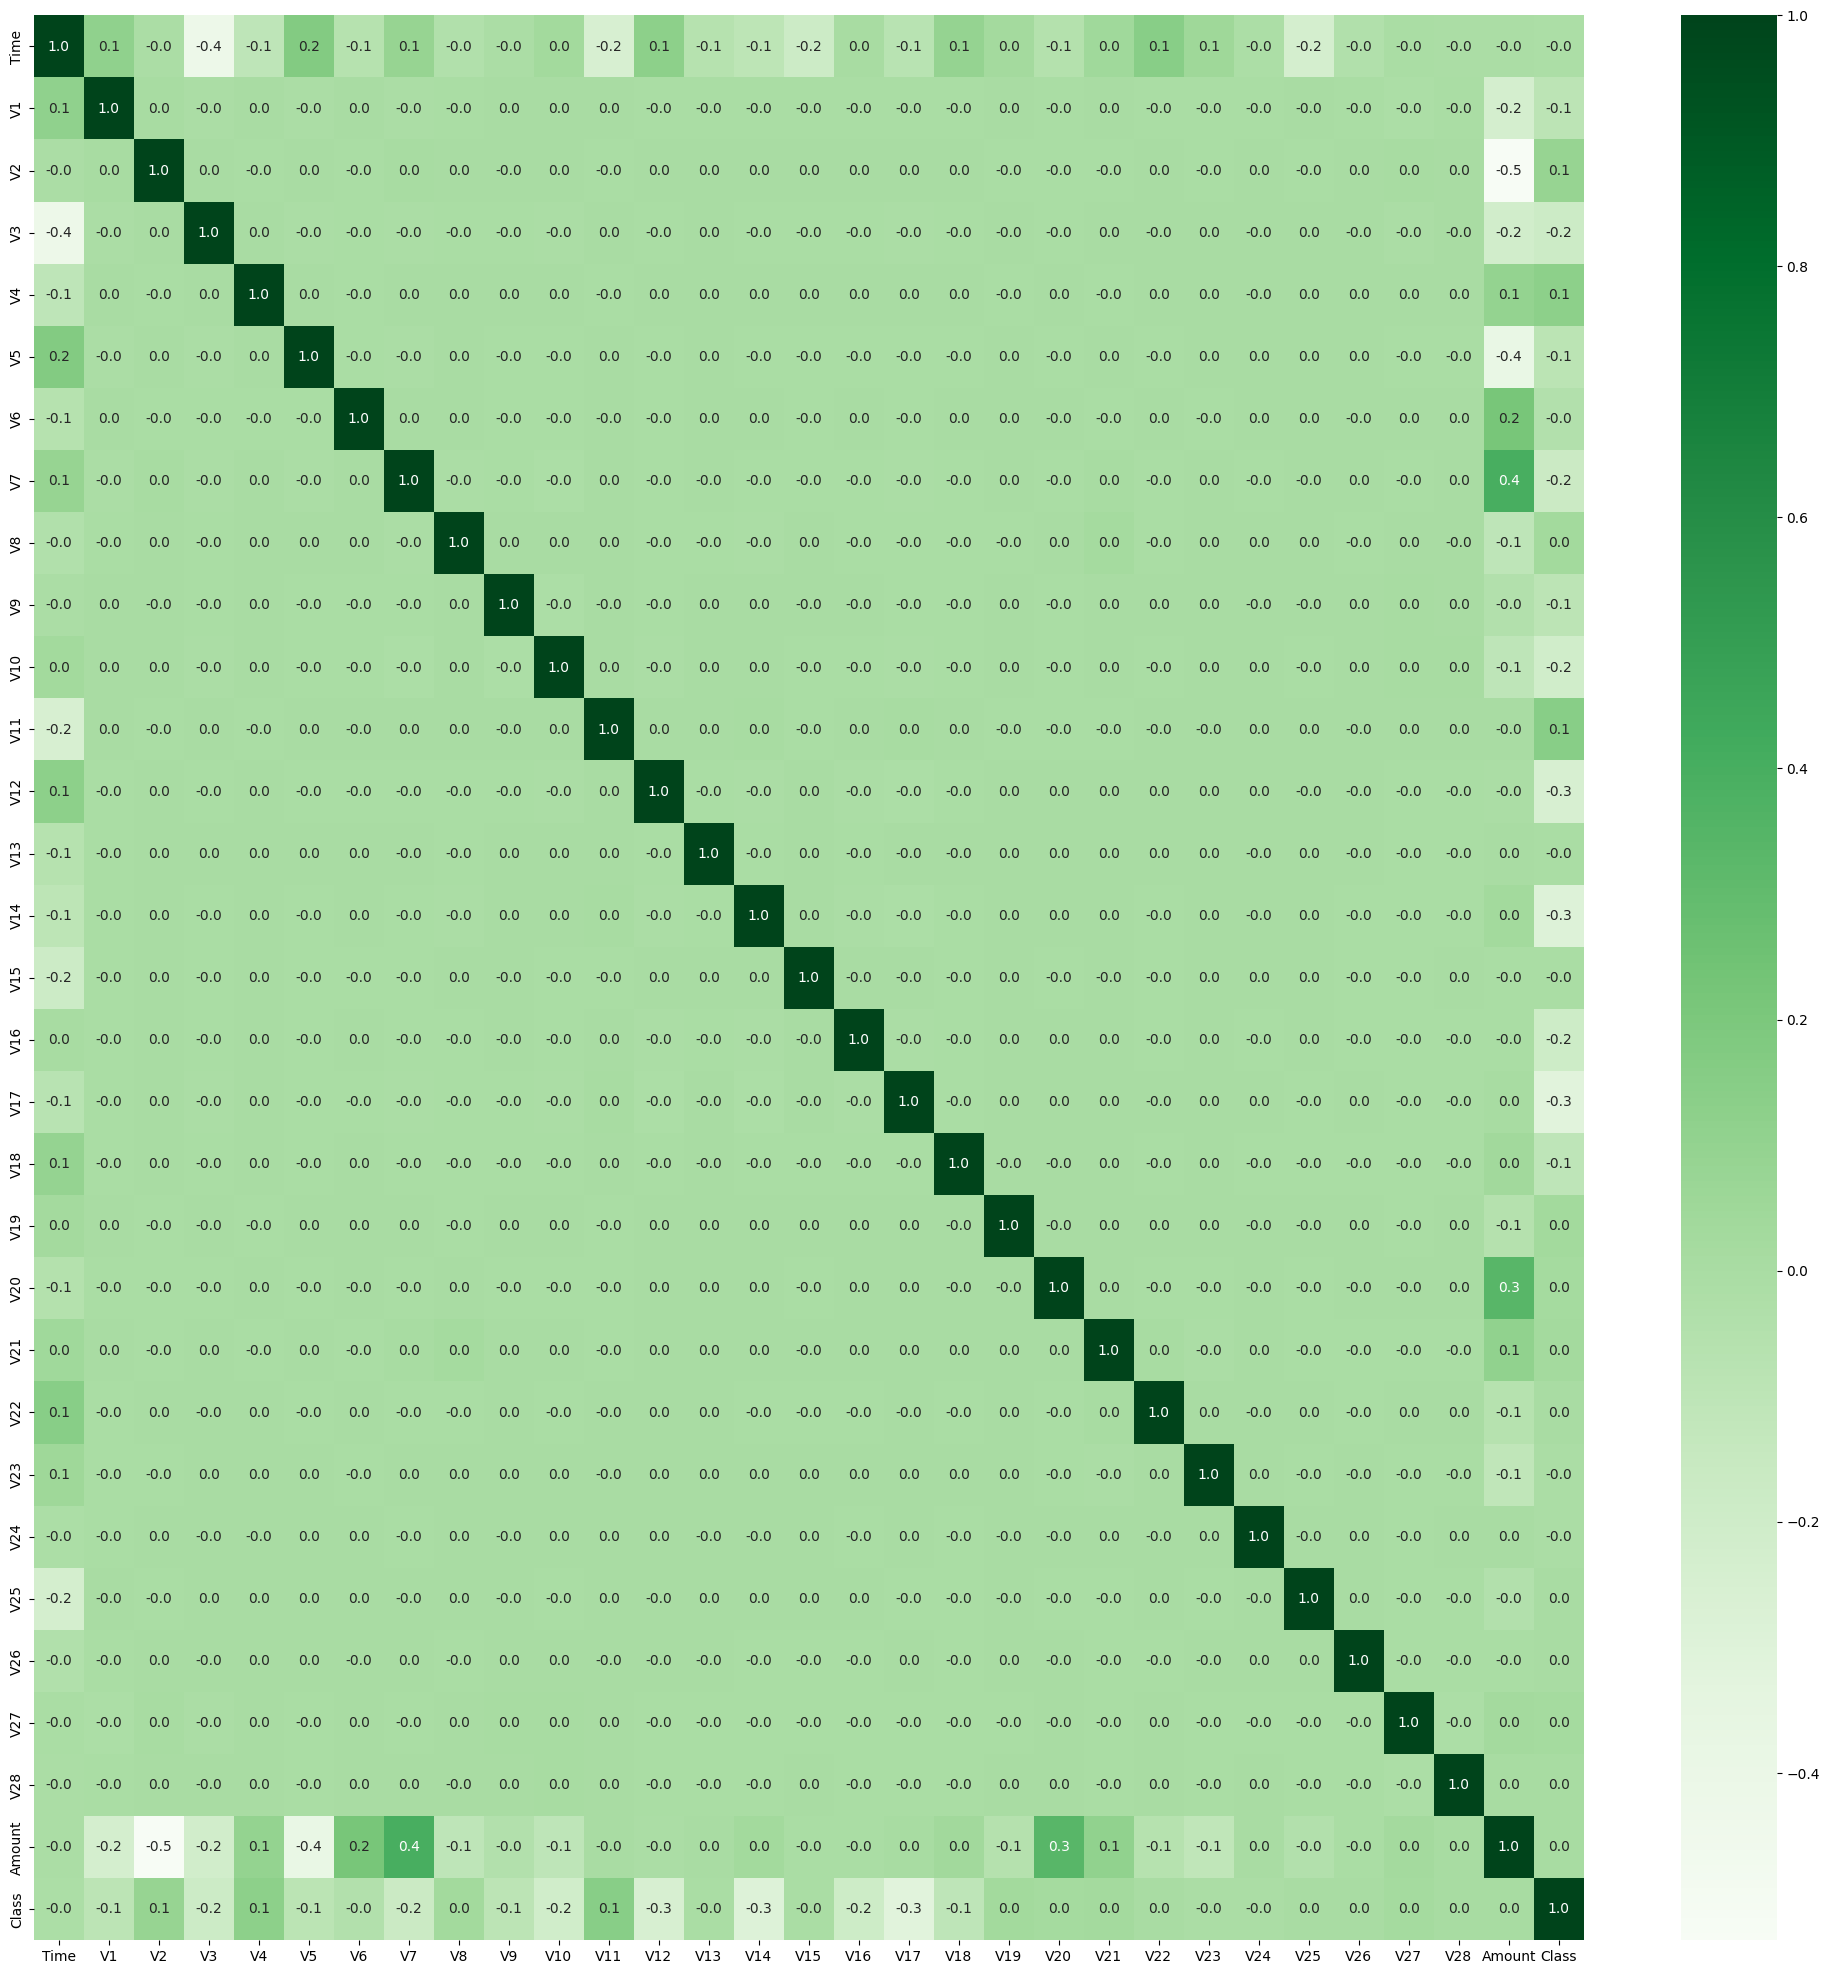

In [9]:
# Heatmap fro correlation of numeric features!
corr_mat = df.corr('pearson')
plt.figure(figsize=(25,25))
sns.heatmap(data=corr_mat, annot=True, fmt="0.1f", cmap='Greens')
plt.show()

In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


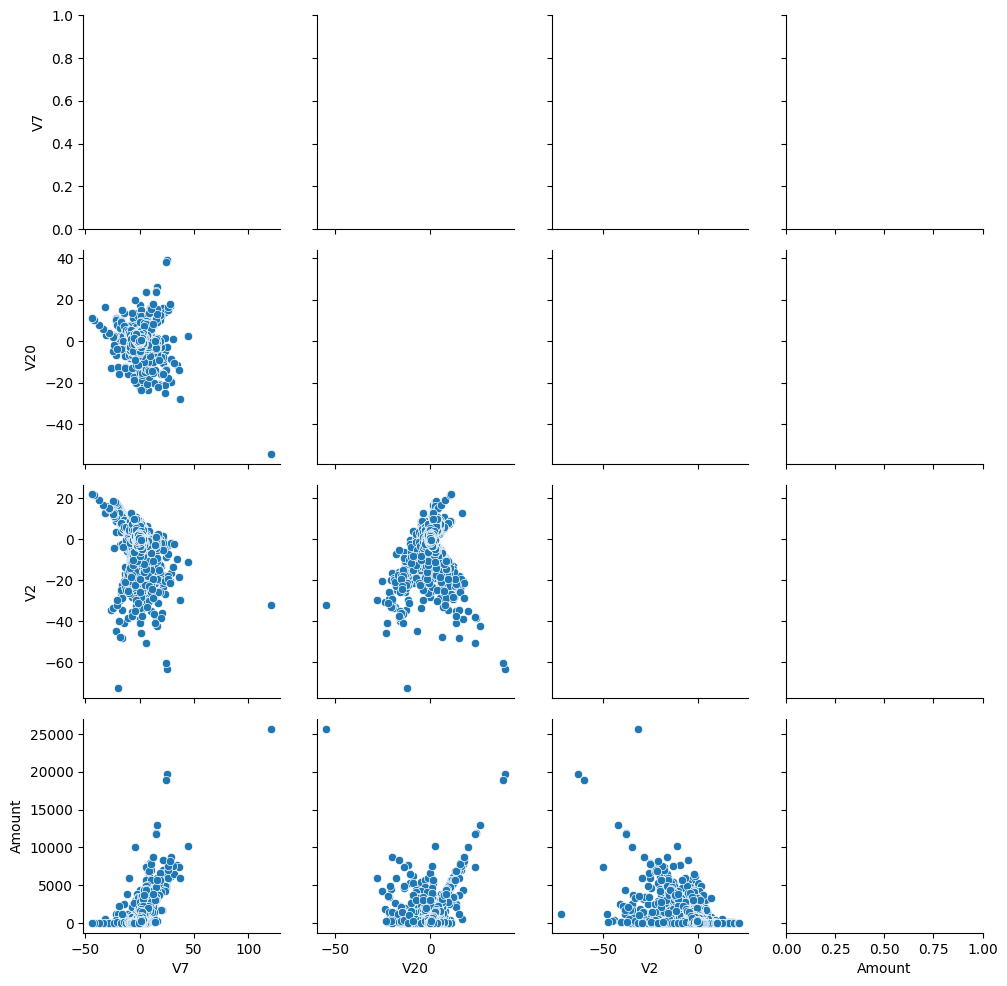

In [11]:
g = sns.PairGrid(df[['V7', 'V20', 'V2', 'Amount']])
g.map_lower(sns.scatterplot)
plt.show()

observations
- Some of the features aren't distributed normally and skewed too; so using yeo-johnson transformation to transform them to gaussian transformation
- There are no hard correlated features in the dataset, so mostly multicollinearity free! even pairplot gives a bare minimum info so

In [12]:
# feature engineering
# Transforming feature using yeo-johnson -> gaussian distribution!
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)
features_to_transform = ['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)]
df_yeoj = pt.fit_transform(df[features_to_transform])
df_yeoj = pd.DataFrame(df_yeoj, columns=pt.get_feature_names_out())
df_yeoj['Class'] = df['Class']

In [13]:
df_yeoj.head()

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.000000,4.493777,-1.081838,-0.072223,3.301464,1.263830,-0.336786,0.436565,0.239426,0.100070,...,0.251949,-0.018322,0.280241,-0.110043,0.067856,0.130059,-0.197513,0.134299,-0.021082,0.0
1,0.000000,1.268358,1.483345,0.273359,0.170994,0.432918,0.060070,-0.083315,-0.078823,0.086125,...,-0.069040,-0.227930,-0.627301,0.101653,-0.318859,0.169716,0.122278,-0.008980,0.014710,0.0
2,0.916060,5.218064,-1.080876,-1.208020,2.177630,0.368606,-0.499950,1.520333,0.789827,0.256045,...,0.527158,0.245448,0.788185,0.933712,-0.612819,-0.318563,-0.143676,-0.055223,-0.059980,0.0
3,0.916060,4.340826,-0.810006,-0.181757,2.205573,-0.917782,-0.010307,1.095768,0.237439,0.396374,...,-0.207666,-0.108812,0.005275,-0.189074,-0.982246,0.681777,-0.233436,0.062890,0.061218,0.0
4,1.727855,3.882043,-0.945580,0.947300,1.865334,0.390541,-0.405012,0.094653,0.591980,-0.261050,...,0.409901,-0.009435,0.815844,-0.136797,0.145346,-0.202271,0.452849,0.221374,0.212364,0.0


In [14]:
# independent and dependent features
features_independent = df.drop('Class', axis=1).columns
x = df[features_independent]
y = df['Class']
# spliting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=55)

In [15]:
# numerical data pipeline
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import MinMaxScaler
num_pipeline = Pipeline([
    ("scaling_down", MinMaxScaler())
])
num_pipeline

,steps,"[('scaling_down', ...)]"
,transform_input,None
,memory,None
,verbose,False
,feature_range,"(0, ...)"
,copy,True
,clip,False


In [16]:
# preprocessing for independent feature 
x_train_transformed = num_pipeline.fit_transform(x_train)
x_test_transformed = num_pipeline.transform(x_test)

In [ ]:
# feature selection using feature importance
from sklearn.model_selection import cross_val_score, TimeSeriesSplit, cross_validate
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_transformed, y_train)

importance = rf.feature_importances_

importance


<Axes: xlabel='Importance', ylabel='Feature'>

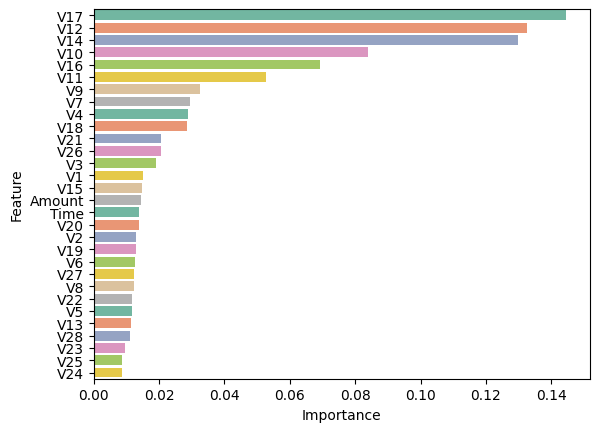

In [ ]:
importance_dict = {}
for i, col in enumerate(num_pipeline.get_feature_names_out()):
    importance_dict[col] = importance[i]
importance_df = pd.DataFrame({'Feature': importance_dict.keys(), 'Importance': importance_dict.values()})
importance_df.sort_values(ascending=False, by='Importance', inplace=True)
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='Set2')

Observations: 
- Most of the features; are already passed through PCA; there feels no need of feature reduction!

# Quick Check for Overfitting

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import StratifiedKFold
rf = RandomForestClassifier()
rf.fit(x_train_transformed, y_train)


log_results = cross_validate(rf, X=x_train_transformed, y=y_train, cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True), verbose=1, n_jobs=-1, scoring=['accuracy', 'precision','recall', 'f1', 'roc_auc'])
print(f"CV: accuracy: {log_results['test_accuracy'].mean()} | precision: {log_results['test_precision'].mean()} | recall: {log_results['test_recall'].mean()} | f1: {log_results['test_f1'].mean()} \n")

train_pred = rf.predict(x_train_transformed)

print("TRAIN: ")
print("accuracy: ",accuracy_score(y_train, train_pred))
print("recall: ",recall_score(y_train, train_pred))
print("f1: ",f1_score(y_train, train_pred), "\n")

print("TEST: ")
y_pred = rf.predict(x_test_transformed)
print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f"p: {precision_score(y_test, y_pred)}")
print(f"recall: {recall_score(y_test, y_pred)}")
print(f"f1: {f1_score(y_test, y_pred)}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.1min finished


CV: accuracy: 0.9995166358356942 | precision: 0.948724590056125 | recall: 0.7515151515151516 | f1: 0.8374701274161431 

TRAIN: 
accuracy:  0.9999949649560944
recall:  0.996969696969697
f1:  0.9984825493171472 

TEST: 
accuracy: 0.9996005545243074
p: 0.957983193277311
recall: 0.7972027972027972
f1: 0.8702290076335878


In [20]:
# Model training
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import ADASYN
models = {
    'logistic reg': LogisticRegression(max_iter=100),
    'naive bayes': GaussianNB(),
    'xgboost': XGBClassifier(),
    'random forest': RandomForestClassifier(verbose=0),
}

# metrics dictionary
metric_dict = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'ROC-AUC': []}
num_models = len(models)

# Training the model
for i, (model_name, model) in enumerate(models.items()):
     # Using KStratified CV (NOTe: This Isn't a Time Series DATASET)
     # ALWAYS CV before Oversampling
    cv_results = cross_validate(model,X=x_train_transformed, y=y_train, cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True), verbose=1, n_jobs=-1, scoring=['accuracy', 'precision','recall', 'f1', 'roc_auc'])
    
    accuracy_cv = cv_results['test_accuracy'].mean()
    precision_cv = cv_results['test_precision'].mean()
    recall_cv = cv_results['test_recall'].mean()
    f1_cv = cv_results['test_f1'].mean()
    roc_auc_cv = cv_results['test_roc_auc'].mean()
    
    # Dealing with class imbalance
    adasyn = ADASYN(random_state=42)
    x_resampled, y_resampled = adasyn.fit_resample(x_train_transformed, y_train)
    
    model.fit(x_resampled, y_resampled)
    y_pred = model.predict(x_test_transformed)
    y_pred_proba = model.predict_proba(x_test_transformed)[:,1]
    
    # test data set:
    accuracy_test = accuracy_score(y_test, y_pred)
    precision_test = precision_score(y_test, y_pred)
    recall_test = recall_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred)
    roc_auc_test = roc_auc_score(y_test, y_pred_proba)
    
    metric_dict['Model'].append(model_name)
    metric_dict['Accuracy'].append(f"CV: {accuracy_cv} | Test: {accuracy_test}")
    metric_dict['Precision'].append(f"CV: {precision_cv} | Test: {precision_test}")
    metric_dict['Recall'].append(f"CV: {recall_cv} | Test: {recall_test}")
    metric_dict['F1-Score'].append(f"CV: {f1_cv} | Test: {f1_test}")
    metric_dict['ROC-AUC'].append(f"CV: {roc_auc_cv} | Test: {roc_auc_test}")
    
    # display % complete
    complete_status = (i+1)/num_models * 100
    print(f"completed: {complete_status:.2f}% of evaluations")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s finished


completed: 25.00% of evaluations


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished


completed: 50.00% of evaluations


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


completed: 75.00% of evaluations


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.8min finished


completed: 100.00% of evaluations


In [21]:
metric_df = pd.DataFrame(metric_dict)
metric_df.sort_values(by='F1-Score', ascending=False)

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
3,random forest,CV: 0.9994964957361241 | Test: 0.9995770577316196,CV: 0.9343772101039848 | Test: 0.9147286821705426,CV: 0.7515151515151516 | Test: 0.8251748251748252,CV: 0.8319449156002678 | Test: 0.8676470588235294,CV: 0.9421426368822516 | Test: 0.9661253309796999
2,xgboost,CV: 0.9993706207792963 | Test: 0.9992011090486148,CV: 0.8789288148914098 | Test: 0.7218934911242604,CV: 0.7242424242424242 | Test: 0.8531468531468531,CV: 0.7933368350269917 | Test: 0.782051282051282,CV: 0.9246471900620566 | Test: 0.9736073752666868
0,logistic reg,CV: 0.9989023604537678 | Test: 0.9290514344791936,CV: 0.8365268917242602 | Test: 0.0217391304347...,CV: 0.42727272727272725 | Test: 0.937062937062...,CV: 0.5632280239444833 | Test: 0.0424924686855...,CV: 0.961630755055946 | Test: 0.978980901416912
1,naive bayes,CV: 0.9786765891833721 | Test: 0.9638266876571348,CV: 0.060807475483957686 | Test: 0.03894472361...,CV: 0.8181818181818181 | Test: 0.8671328671328671,CV: 0.11319637421319503 | Test: 0.074541629095...,CV: 0.9580232881453756 | Test: 0.9618104460999429


accuracy: 0.9995770577316196
precision: 0.9147286821705426
recall: 0.8251748251748252
f1: 0.8676470588235294
roc_auc: 0.9661253309796999


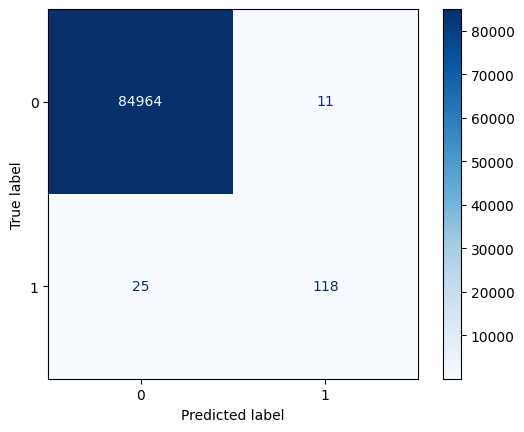

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
best_model_name = 'random forest'
best_model = models[best_model_name]

# Prediction
y_pred = best_model.predict(x_test_transformed)
y_pred_proba = best_model.predict_proba(x_test_transformed)

# Evalutions
print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f"precision: {precision_score(y_test, y_pred)}")
print(f"recall: {recall_score(y_test, y_pred)}")
print(f"f1: {f1_score(y_test, y_pred)}")
print(f"roc_auc: {roc_auc_score(y_test, y_pred_proba[:,1])}")

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
cmd.plot(cmap='Blues')


Hyperparameter tuning

In [26]:
parameters = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2']
}

In [ ]:
# hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# best paramaters
random_cv = RandomizedSearchCV(estimator=best_model, param_distributions=parameters, verbose=True, n_jobs=-1, scoring='f1', cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))
random_cv.fit(x_resampled, y_resampled)
print(f"Best parameters: {random_cv.best_params_}")
print(f"Best F1-Score: {random_cv.best_score_}")

In [ ]:
# Training with the best estimator!
best_rf_model = random_cv.best_estimator_
best_rf_model.fit(x_resampled, y_resampled)

# predict on test data
y_pred = best_rf_model.predict(x_test_transformed)
y_pred_proba = best_rf_model.predict_proba(x_test_transformed)[:,1]

# Evalutions 
print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f"precision: {precision_score(y_test, y_pred)}")
print(f"recall: {recall_score(y_test, y_pred)}")
print(f"f1: {f1_score(y_test, y_pred)}")
print(f"roc_auc: {roc_auc_score(y_test, y_pred_proba)}")

# confusion matrix
cm = confusion_matrix(x_test_transformed, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf_model.classes_)  
cmd.plot(cmap='Blues')

In [ ]:
import joblib
# joblib.dump(best_model, 'CreditCardFraudDetection.pkl')

['CreditCardFraudDetection.pkl']

# ML Pipelines for New data

In [32]:
from sklearn.preprocessing import FunctionTransformer
def data_cleaning(df):
    df.drop_duplicates(inplace=True)
    return df

def yeo_johnson(df):
    pt = PowerTransformer(method='yeo-johnson', standardize=False)
    features_to_transform = ['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)]
    df_yeoj = pt.fit_transform(df[features_to_transform])
    df_yeoj = pd.DataFrame(df_yeoj, columns=pt.get_feature_names_out())
    df_yeoj['Class'] = df['Class']
    return df_yeoj

data_pipeline = Pipeline([
    ("datacleaning",FunctionTransformer(data_cleaning)),
    ("gaussian_transformation (skewed fixed)", FunctionTransformer(yeo_johnson)),
    ("num_pipeline", num_pipeline)
    ])
    
# data splitting
x = df.drop('Class', axis=1)
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

train_data = x_train.copy()

# our pipeline flexing it's looks
data_pipeline

,steps,"[('datacleaning', ...), ('gaussian_transformation (skewed fixed)', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,func,<function dat...0017935A902C0>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None


In [84]:

best_rf_model = joblib.load('CreditCardFraudDetection.pkl')

def predict_fraud(df_new_test):
    # preprocessing on new test data
    x_transformed_test = data_pipeline[-1:].transform(df_new_test)
    # converting the transformed data into dataframe
    x_transformed_test = pd.DataFrame(x_transformed_test)
    # giving the og columns names back to the dataframe
    x_transformed_test.columns = data_pipeline[-1:].get_feature_names_out()
    
    # prediction 
    test_data_predict = best_rf_model.predict(x_transformed_test)
    
    return test_data_predict


In [85]:
# print(data_pipeline[-1:].get_feature_names_out())
# len(data_pipeline[-1:].get_feature_names_out())

In [119]:
# examples= pd.DataFrame({
#     # Time (Seconds elapsed from first transaction)
#     'Time': [0.0, 1.0, 2.0, 406.8, 472.0, 529.0, 600.0, 700.0, 800.0, 900.0],
    
#     # Anonymized Principal Components (V1 - V28)
#     'V1': [-1.359807, -1.358354, -1.158233, -2.312227, -3.043541, -2.133221, -0.960309, 1.192534, -0.428982, 0.709033],
#     'V2': [-0.072781, -1.340163, 0.877737, 1.951992, -3.157307, 1.076865, 0.380299, 0.237651, 0.701389, -0.528485],
#     'V3': [2.536347, 1.773209, 1.548718, -1.609851, -3.881827, -0.587843, 1.054363, 0.598069, 1.488390, 0.444445],
#     'V4': [1.378155, 0.379780, 0.403034, 3.997906, 4.133402, 0.050720, 0.491299, 1.025732, -0.540139, 0.582813],
#     'V5': [-0.338321, -0.503198, -0.407193, -0.772671, -1.139829, -0.019888, 0.080539, -0.686522, 0.380397, -0.758416],
#     'V6': [0.462388, 0.057876, 0.095921, -0.256873, -0.239846, -0.003310, -0.215570, -0.669888, -0.464010, -0.490797],
#     'V7': [0.239599, 0.234567, 0.263968, -0.353383, -0.489240, -0.191295, 0.170498, 0.402325, 0.223841, 0.198270],
#     'V8': [0.098698, 0.097103, 0.059292, -0.081826, 0.004455, 0.082260, 0.091173, -0.021028, 0.094901, 0.002495],
#     'V9': [0.363787, 0.094982, 0.147921, -0.097003, -0.418272, -0.255979, 0.380775, 0.509794, -0.038459, 0.428741],
#     'V10': [0.090794, 0.096301, 0.023743, -0.110292, -0.510345, -0.134371, 0.266209, 0.221081, 0.214436, 0.059737],
#     'V11': [-0.551600, -0.561514, -0.567083, -0.569472, -0.570116, -0.570220, -0.570301, -0.570405, -0.570499, -0.570588],
#     'V12': [-0.617801, -0.627197, -0.636605, -0.645902, -0.655196, -0.664483, -0.673752, -0.682998, -0.692237, -0.701460],
#     'V13': [-0.991390, -0.985160, -0.978917, -0.972660, -0.966396, -0.960126, -0.953849, -0.947565, -0.941276, -0.934980],
#     'V14': [-0.311169, -0.306187, -0.301170, -0.296119, -0.291032, -0.285906, -0.280740, -0.275535, -0.270287, -0.264998],
#     'V15': [1.468177, 1.463098, 1.458000, 1.452889, 1.447764, 1.442627, 1.437477, 1.432314, 1.427138, 1.421950],
#     'V16': [-0.470401, -0.465306, -0.460199, -0.455080, -0.449949, -0.444807, -0.439652, -0.434484, -0.429304, -0.424110],
#     'V17': [0.207971, 0.202868, 0.197758, 0.192634, 0.187498, 0.182350, 0.177189, 0.172015, 0.166828, 0.161628],
#     'V18': [0.025791, 0.020686, 0.015573, 0.010447, 0.005310, 0.000162, -0.004987, -0.010149, -0.015325, -0.020516],
#     'V19': [0.403993, 0.398894, 0.393787, 0.388669, 0.383540, 0.378399, 0.373248, 0.368087, 0.362915, 0.357732],
#     'V20': [0.251412, 0.256259, 0.261108, 0.265955, 0.270799, 0.275641, 0.280480, 0.285317, 0.290151, 0.294982],
#     'V21': [-0.018307, -0.023126, -0.027938, -0.032742, -0.037536, -0.042322, -0.047098, -0.051865, -0.056622, -0.061369],
#     'V22': [0.277838, 0.272911, 0.267978, 0.263038, 0.258092, 0.253138, 0.248177, 0.243209, 0.238233, 0.233250],
#     'V23': [-0.110474, -0.115309, -0.120138, -0.124958, -0.129770, -0.134575, -0.139371, -0.144158, -0.148936, -0.153706],
#     'V24': [0.066928, 0.071764, 0.076595, 0.081420, 0.086237, 0.091048, 0.095852, 0.100649, 0.105437, 0.110219],
#     'V25': [0.128539, 0.123707, 0.118870, 0.114026, 0.109176, 0.104320, 0.099457, 0.094588, 0.089712, 0.084828],
#     'V26': [-0.189115, -0.184318, -0.179516, -0.174708, -0.169894, -0.165074, -0.160248, -0.155416, -0.150577, -0.145732],
#     'V27': [0.133558, 0.138356, 0.143148, 0.147934, 0.152713, 0.157486, 0.162253, 0.167013, 0.171766, 0.176512],
#     'V28': [-0.021053, -0.025859, -0.030656, -0.035445, -0.040226, -0.045000, -0.049767, -0.054526, -0.059278, -0.064022],
    
#     'Amount': [149.62, 378.66, 69.99, 0.00, 529.00, 25.00, 50.00, 1.00, 30.00, 10.00],
    
    
# })

In [120]:
df_test = pd.read_csv("trialbby.csv")
df_test.rename(columns={"Time (s)": "Time"}, inplace=True)
Class = df_test['Class'].to_list()
df_test.drop(["#", 'Class'], axis=1, inplace=True)
df_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,450,-0.96,0.81,1.12,0.25,-0.11,0.76,0.05,0.17,-0.19,...,0.09,-0.07,0.08,-0.19,0.11,0.40,0.29,0.08,0.04,12.50
1,720,1.05,-0.29,0.56,0.52,-0.23,0.15,-0.07,0.14,0.51,...,-0.10,-0.22,-0.63,0.07,-0.34,0.45,0.31,0.01,0.02,75.00
2,1000,-1.95,-0.18,-1.55,2.60,-0.98,-0.20,-1.13,0.89,-1.89,...,0.24,0.45,-0.59,0.08,0.35,-0.22,-0.05,-0.31,-0.15,89.99
3,1250,1.19,0.21,0.52,0.45,-0.23,-0.04,0.01,0.08,-0.04,...,-0.11,-0.17,-0.52,0.02,-0.42,0.35,0.20,0.01,0.02,1.99
4,1600,-0.87,4.30,-6.37,5.45,-0.65,-1.45,-1.92,0.82,-3.79,...,0.51,1.07,-0.19,-0.59,-0.14,0.44,0.20,1.40,0.50,0.00
5,1850,0.01,0.03,0.59,-0.33,0.21,0.22,0.18,0.01,0.35,...,0.01,-0.10,-0.31,0.06,-0.49,-0.42,0.30,0.09,0.06,4.99
6,2100,-0.62,0.83,1.48,0.19,0.02,0.08,0.40,0.30,-0.18,...,0.06,0.09,-0.21,-0.01,0.69,-0.10,0.09,0.33,0.15,25.00
7,2450,-2.31,1.37,-2.93,2.28,-1.71,-1.42,-2.77,1.13,-2.58,...,0.49,0.79,-0.12,-0.25,0.05,0.01,0.17,0.70,0.15,1.00
8,2700,1.25,-0.05,0.43,0.31,-0.45,-0.18,-0.23,0.07,0.33,...,-0.15,-0.10,-0.36,0.01,-0.09,0.19,0.59,0.00,0.01,35.95
9,3000,-0.37,1.01,1.14,-0.17,0.22,-0.28,0.72,0.01,-0.58,...,0.04,-0.19,-0.56,-0.01,0.03,-0.12,0.15,0.20,0.07,15.00


In [126]:
# prediction function
 
# df_test = pd.DataFrame(examples)
predictions = predict_fraud(df_test)
for i in predictions:
    if (i == 1):
        print("fraudulent? YES")
    else:
        print("Not Fraudulent")

Not Fraudulent
Not Fraudulent
fraudulent? YES
Not Fraudulent
fraudulent? YES
Not Fraudulent
Not Fraudulent
fraudulent? YES
Not Fraudulent
Not Fraudulent
Not Fraudulent
fraudulent? YES
Not Fraudulent
Not Fraudulent
fraudulent? YES
Not Fraudulent
Not Fraudulent
fraudulent? YES
Not Fraudulent
Not Fraudulent
Not Fraudulent
fraudulent? YES
Not Fraudulent
Not Fraudulent
fraudulent? YES
Not Fraudulent
Not Fraudulent
fraudulent? YES
Not Fraudulent
Not Fraudulent
fraudulent? YES
Not Fraudulent
Not Fraudulent
Not Fraudulent
fraudulent? YES
Not Fraudulent
Not Fraudulent
fraudulent? YES
Not Fraudulent
Not Fraudulent
fraudulent? YES
Not Fraudulent
Not Fraudulent
Not Fraudulent
fraudulent? YES
Not Fraudulent
Not Fraudulent
Not Fraudulent
fraudulent? YES
Not Fraudulent


In [127]:
real_world_df = pd.DataFrame({"Prediction": predictions, "True Result": Class})
real_world_df

,Prediction,True Result
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0
